Source => http://peterroelants.github.io/posts/neural_network_implementation_part05/

In [46]:
# Python imports
import numpy as np # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
# Allow matplotlib to plot inside this notebook
%matplotlib inline
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from matplotlib import cm # Colormaps
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)
from sklearn import datasets, cross_validation, metrics # data and evaluation utils
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
import itertools
import collections


#Linear Regression

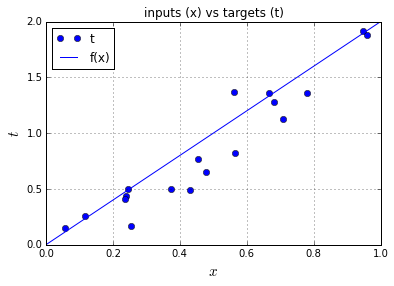

In [21]:
# Define the vector of input samples as x, with 20 values sampled from a uniform distribution
# between 0 and 1
x = np.random.uniform(0, 1, 20)

# Generate the target values t from x with small gaussian noise so the estimation won't
# be perfect.
# Define a function f that represents the line that generates t without noise
def f(x): return x * 2

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = np.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (t)')
plt.grid()
plt.legend(loc=2)
plt.show()

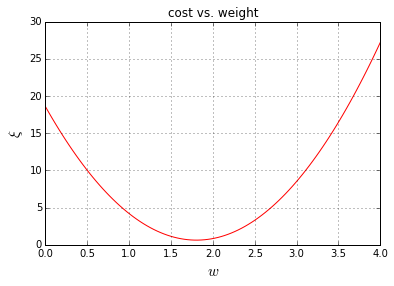

In [29]:
# Define the neural network function y = x * w
def nn(x, w): return x * w

# Define the cost function
def cost(y, t): return ((t - y)**2).sum()
# Define a vector of weights for which we want to plot the cost
ws = np.linspace(0, 4, num=100)  # weight values
cost_ws = np.vectorize(lambda w: cost(nn(x, w) , t))(ws)  # cost for each weight in ws

# Plot the cost vs the given weight w
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('cost vs. weight')
plt.grid()
plt.show()

In [37]:
# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, x, t): return 2 * x * (nn(x, w) - t)

# define the update function delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()
# Set the initial weight parameter
w = 0.1
# Set the learning rate
learning_rate = 0.1

# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 10  # number of gradient descent updates
for i in range(nb_of_iterations):
    # Print the current w, and cost
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w, cost(nn(x, w), t)))
    dw = delta_w(w, x, t, learning_rate)  # get the delta w update
    w = w - dw  # update the current weight parameter

# Print the final w, and cost
print('w({}): {:.4f} \t cost: {:.4f}'.format(nb_of_iterations, w, cost(nn(x, w), t)))

w(0): 0.1000 	 cost: 16.6305
w(1): 1.9780 	 cost: 0.7943
w(2): 1.7865 	 cost: 0.6296
w(3): 1.8060 	 cost: 0.6279
w(4): 1.8040 	 cost: 0.6279
w(5): 1.8042 	 cost: 0.6279
w(6): 1.8042 	 cost: 0.6279
w(7): 1.8042 	 cost: 0.6279
w(8): 1.8042 	 cost: 0.6279
w(9): 1.8042 	 cost: 0.6279
w(10): 1.8042 	 cost: 0.6279


Logistic Regression

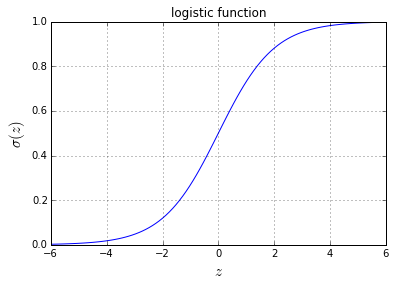

In [38]:
# Define the logistic function
def logistic(z): return 1 / (1 + np.exp(-z))

# Plot the logistic function
z = np.linspace(-6,6,100)
plt.plot(z, logistic(z), 'b-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$\sigma(z)$', fontsize=15)
plt.title('logistic function')
plt.grid()
plt.show()

In [40]:
# Define and generate the samples
nb_of_samples_per_class = 20  # The number of sample in each class
red_mean = [-1,0]  # The mean of the red class
blue_mean = [1,0]  # The mean of the blue class
std_dev = 1.2  # standard deviation of both classes
# Generate samples from both classes
x_red = np.random.randn(nb_of_samples_per_class, 2) * std_dev + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2) * std_dev + blue_mean

# Merge samples in set of input variables x, and corresponding set of output variables t
X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class,1)), np.ones((nb_of_samples_per_class,1))))

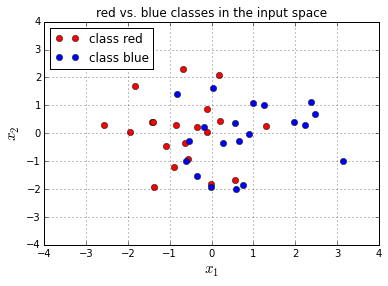

In [41]:
# Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-4, 4, -4, 4])
plt.title('red vs. blue classes in the input space')
plt.show()

In [47]:
# Define the logistic function
def logistic(z): return 1 / (1 + np.exp(-z))

# Define the neural network function y = 1 / (1 + numpy.exp(-x*w))
def nn(x, w): return logistic(x.dot(w.T))

# Define the neural network prediction function that only returns
#  1 or 0 depending on the predicted class
def nn_predict(x,w): return np.around(nn(x,w))
    
# Define the cost function
def cost(y, t):
    return - np.sum(np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))

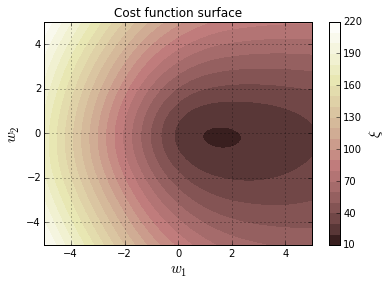

In [48]:
# Plot the cost in function of the weights
# Define a vector of weights for which we want to plot the cost
nb_of_ws = 100 # compute the cost nb_of_ws times in each dimension
ws1 = np.linspace(-5, 5, num=nb_of_ws) # weight 1
ws2 = np.linspace(-5, 5, num=nb_of_ws) # weight 2
ws_x, ws_y = np.meshgrid(ws1, ws2) # generate grid
cost_ws = np.zeros((nb_of_ws, nb_of_ws)) # initialize cost matrix
# Fill the cost matrix for each combination of weights
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        cost_ws[i,j] = cost(nn(X, np.asmatrix([ws_x[i,j], ws_y[i,j]])) , t)
# Plot the cost function surface
plt.contourf(ws_x, ws_y, cost_ws, 20, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=15)
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Cost function surface')
plt.grid()
plt.show()

NEURAL NETS

In [49]:
# Python imports
import numpy as np # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm # Colormaps
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)


In [51]:
# Define and generate the samples
nb_of_samples_per_class = 20  # The number of sample in each class
blue_mean = [0]  # The mean of the blue class
red_left_mean = [-2]  # The mean of the red class
red_right_mean = [2]  # The mean of the red class

std_dev = 0.5  # standard deviation of both classes
# Generate samples from both classes
x_blue = np.random.randn(nb_of_samples_per_class, 1) * std_dev + blue_mean
x_red_left = np.random.randn(nb_of_samples_per_class/2, 1) * std_dev + red_left_mean
x_red_right = np.random.randn(nb_of_samples_per_class/2, 1) * std_dev + red_right_mean

# Merge samples in set of input variables x, and corresponding set of
# output variables t
x = np.vstack((x_blue, x_red_left, x_red_right))
t = np.vstack((np.ones((x_blue.shape[0],1)), 
               np.zeros((x_red_left.shape[0],1)), 
               np.zeros((x_red_right.shape[0], 1))))

In [52]:
# Define the logistic function
def logistic(z): return 1 / (1 + np.exp(-z))

# Function to compute the hidden activations
def hidden_activations(x, wh):
    return rbf(x * wh)

# Define output layer feedforward
def output_activations(h , wo):
    return logistic(h * wo - 1)

# Define the neural network function
def nn(x, wh, wo): 
    return output_activations(hidden_activations(x, wh), wo)

# Define the neural network prediction function that only returns
#  1 or 0 depending on the predicted class
def nn_predict(x, wh, wo): 
    return np.around(nn(x, wh, wo))


In [53]:
import pandas as pd

In [54]:
a={'builder': {'FP': 0, 'Count': 2, 'Recall': 0.0, 'Precision': 'NA', 'TP': 0, 'FN': 2}, 'total': {'FP': 1, 'Count': 13, 'Recall': 0.6923076923076923, 'Precision': 0.9, 'TP': 9, 'FN': 4}, 'location': {'FP': 1, 'Count': 11, 'Recall': 0.6923076923076923, 'Precision': 0.9, 'TP': 9, 'FN': 4}}

In [57]:
pd.DataFrame(a)

,builder,location,total
Count,2,11.000000,13.000000
FN,2,4.000000,4.000000
FP,0,1.000000,1.000000
Precision,NA,0.900000,0.900000
Recall,0,0.692308,0.692308
TP,0,9.000000,9.000000


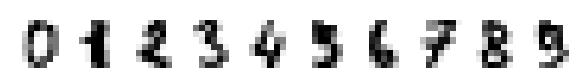

In [2]:
# load the data from scikit-learn.
digits = datasets.load_digits()

# Plot an example of each image.
fig = plt.figure(figsize=(10, 1), dpi=100)
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    ax.matshow(digits.images[i], cmap='binary') 
    ax.axis('off')
plt.show()

# Load the targets.
# Note that the targets are stored as digits, these need to be 
#  converted to one-hot-encoding for the output sofmax layer.
T = np.zeros((digits.target.shape[0],10))
T[np.arange(len(T)), digits.target] += 1

# Divide the data into a train and test set.
X_train, X_test, T_train, T_test = cross_validation.train_test_split(
    digits.data, T, test_size=0.4)
# Divide the test set into a validation set and final test set.
X_validation, X_test, T_validation, T_test = cross_validation.train_test_split(
    X_test, T_test, test_size=0.5)

In [18]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digits.keys()

dict_keys(['images', 'target_names', 'DESCR', 'target', 'data'])

In [17]:
T = np.zeros((digits.target.shape[0],10))
T

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])